In [11]:
import gc
import sys
import pandas as pd
import pegasus as pg
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def restructure(adata2restruct):
    # Parse latest clustring results and remove previous versions
    a = [col[12:] for col in adata2restruct.obs.columns if 'Cell types v' in col]
    max_num = max([int(x) for x in a if x.isdigit()])
    col_name = f"Cell types v{str(max_num)}"
    print(f"=====> Using {col_name} as the latest clustering column.", file=sys.stderr)
    adata2restruct.obs.rename(columns={col_name: "latest_annot"}, inplace=True)
    # Only keep relevant columns in observations and variables
    adata2restruct.obs.drop([col
                             for col in adata2restruct.obs.columns
                             if "Cell types" in col] + ["batch"],
                            axis=1, inplace=True)
    adata2restruct.obs.drop([col
                             for col in adata2restruct.obs.columns
                             if "leiden" in col],
                            axis=1, inplace=True)
    print(f"Cell number: {adata2restruct.shape[0]}", file=sys.stderr)

In [13]:
data = pg.read_input(f"/lustre/scratch126/casm/team-cvejic/nelson/data/lung/scRNAseq/outputs/10X_Lung_Healthy_Background_Annotated_v2.h5ad")
# data = pg.read_input(f"/lustre/scratch126/casm/team-cvejic/nelson/data/lung/scRNAseq/outputs/10X_Lung_Tumour_Annotated_v2.h5ad")

2023-09-28 13:26:29,392 - pegasusio.readwrite - INFO - h5ad file '/lustre/scratch126/casm/team-cvejic/nelson/data/lung/scRNAseq/outputs/10X_Lung_Healthy_Background_Annotated_v2.h5ad' is loaded.
2023-09-28 13:26:29,393 - pegasusio.readwrite - INFO - Function 'read_input' finished in 98.18s.


In [14]:
restructure(data)
gc.collect()

=====> Using Cell types v12 as the latest clustering column.
Cell number: 392604


43697

In [15]:
CTYPES2REMOVE = ["Cycling myeloid cells,2,0 (to remove)", "Mast cells,3 (to remove)", "Mast cells,9 (to remove)",
                 "Mast cells,7 (to remove)", "Mast cells,9 (to remove)", "8,1"]

In [16]:
data = data[~data.obs["latest_annot"].isin(CTYPES2REMOVE), :].copy()
data.shape[0]
data.obs["latest_annot"] = data.obs["latest_annot"].astype("str").astype("category")

In [17]:
gc.collect()

0

# Box plots on UMI counts and gene numbers

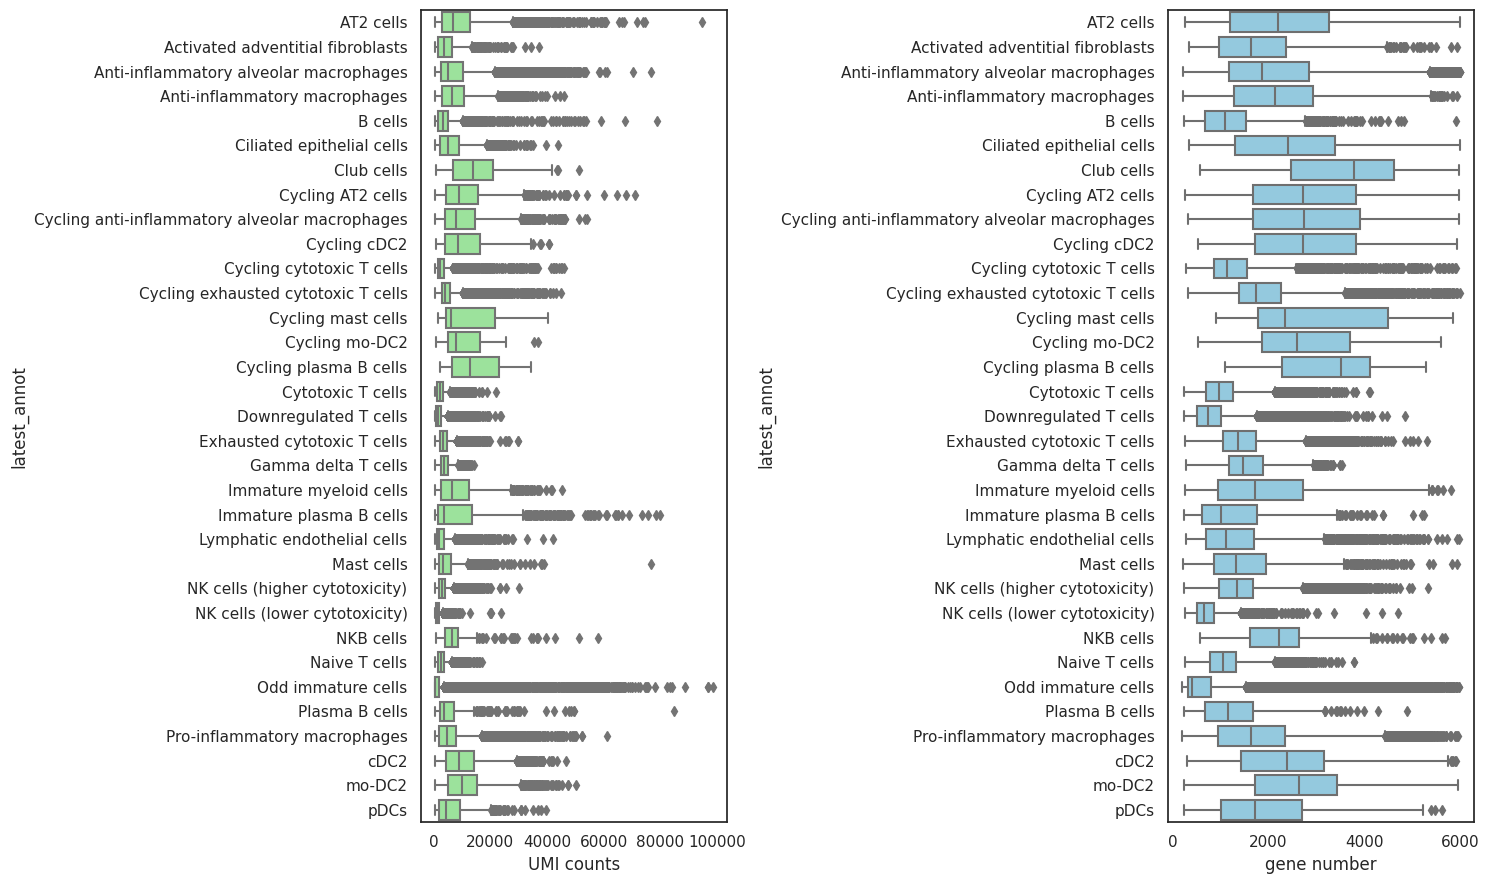

In [18]:
sns.set_theme(style="white", font_scale=1)
_, axes = plt.subplots(1, 2, figsize=(15, 9))
sns.boxplot(data=data.obs, y="latest_annot", x="total_counts", ax=axes[0], color="lightgreen")
axes[0].set(xlabel="UMI counts")
sns.boxplot(data=data.obs, y="latest_annot", x="n_genes_by_counts", ax=axes[1], color="skyblue")
axes[1].set(xlabel="gene number")
plt.tight_layout()
plt.savefig("../../../../results/scRNA-seq/check_CAMLs/bh_UMI_geneNum_boxplots.pdf")

# Doublet Scores 

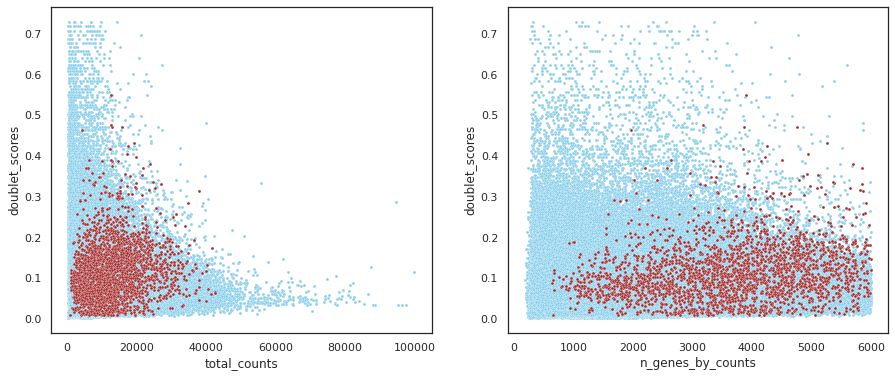

In [10]:
sns.set_theme(style="white", font_scale=1)
_, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(data=data.loc[data["latest_annot"] != "CAMLs", :],
                x="total_counts", y="doublet_scores", color="skyblue", s=9, ax=axes[0])
sns.scatterplot(data=data.loc[data["latest_annot"] == "CAMLs", :],
                x="total_counts", y="doublet_scores", color="brown", s=9, ax=axes[0])
sns.scatterplot(data=data.loc[data["latest_annot"] != "CAMLs", :],
                x="n_genes_by_counts", y="doublet_scores", color="skyblue", s=9, ax=axes[1])
sns.scatterplot(data=data.loc[data["latest_annot"] == "CAMLs", :],
                x="n_genes_by_counts", y="doublet_scores", color="brown", s=9, ax=axes[1])
plt.savefig("../../results/scRNA-seq/check_res/scatterplot_totalcounts_doubletscores.png", bbox_inches="tight", facecolor="white")

In [11]:
gc.collect()

77